<a href="https://colab.research.google.com/github/shivi13102/Healthcare-Fraud-Provider-Detection-Analysis/blob/main/DataModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
# Load the final data
train_beneficiary= pd.read_excel('/content/drive/My Drive/FDS PROJECT/Final_data/train_bene_final_data.xlsx')

In [4]:
display(train_beneficiary.columns)

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'Country', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'ChronicConditionCount'],
      dtype='object')

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define thresholds for fraud detection
threshold_ip = train_beneficiary['IPAnnualReimbursementAmt'].quantile(0.95)  # Top 5% for inpatient
threshold_op = train_beneficiary['OPAnnualReimbursementAmt'].quantile(0.95)  # Top 5% for outpatient

# Create the target variable 'fraud'
train_beneficiary['fraud'] = np.where(
    (train_beneficiary['IPAnnualReimbursementAmt'] > threshold_ip) |
    (train_beneficiary['OPAnnualReimbursementAmt'] > threshold_op),
    1,  # Fraudulent
    0   # Not fraudulent
)

# Define features (X) and target (y)
X = train_beneficiary.drop(columns=['fraud', 'DOB', 'DOD', 'BeneID'])  # Drop non-feature columns
y = train_beneficiary['fraud']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("AUC-ROC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("AUC-ROC:", roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       886
           1       0.90      0.77      0.83       102

    accuracy                           0.97       988
   macro avg       0.94      0.88      0.91       988
weighted avg       0.97      0.97      0.97       988

AUC-ROC: 0.9940910901606693
Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      0.99      1.00       102

    accuracy                           1.00       988
   macro avg       1.00      1.00      1.00       988
weighted avg       1.00      1.00      1.00       988

AUC-ROC: 1.0
Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       102

    accuracy                           1.00       988
   macro avg       1.00      1.0

Unsupervised

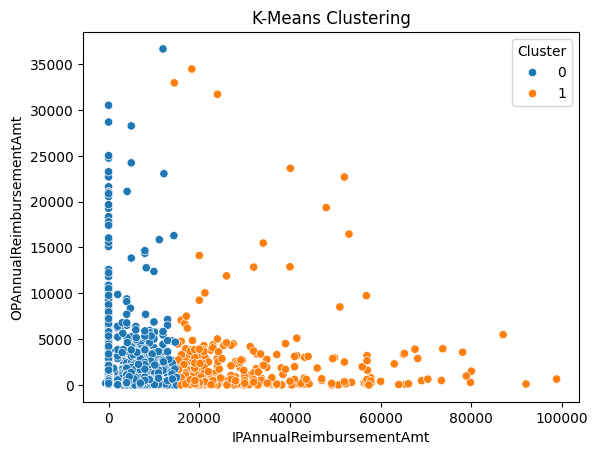

Detected Anomalies:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,ChronicConditionCount,fraud,Cluster,Anomaly
7,BENE11089,1926-10-01,NaT,F,3,Y,12,20,12,12,...,0,0,0,480,620,98,7,0,0,-1
18,BENE11163,1941-10-01,NaT,M,3,N,33,20,12,1,...,0,5700,1068,10,0,83,1,0,0,-1
35,BENE11300,1921-05-01,NaT,F,1,Y,5,20,12,12,...,0,0,0,180,440,103,6,0,0,-1
48,BENE11491,1956-04-01,NaT,M,2,Y,11,90,12,12,...,0,4000,1068,410,250,68,6,0,0,-1
78,BENE11831,1926-10-01,NaT,F,1,N,12,20,12,12,...,0,0,0,8800,1110,98,6,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,BENE83988,1928-03-01,NaT,M,2,N,15,380,12,12,...,1,4000,1068,120,0,96,5,0,0,-1
4873,BENE84075,1970-01-01,NaT,M,1,N,52,380,12,12,...,0,0,0,2390,1790,54,8,0,0,-1
4920,BENE84812,1929-08-01,NaT,F,1,N,21,20,12,12,...,0,11000,1068,730,90,95,6,0,0,-1
4922,BENE84867,1930-07-01,NaT,M,1,N,16,60,12,12,...,0,0,0,2180,620,94,10,0,0,-1


In [6]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

# K-Means Clustering
kmeans = KMeans(n_clusters=2)  # Adjust the number of clusters as needed
train_beneficiary['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
sns.scatterplot(data=train_beneficiary, x='IPAnnualReimbursementAmt', y='OPAnnualReimbursementAmt', hue='Cluster')
plt.title("K-Means Clustering")
plt.show()

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination as needed
train_beneficiary['Anomaly'] = iso_forest.fit_predict(X)
anomalies = train_beneficiary[train_beneficiary['Anomaly'] == -1]  # Outliers

# Print anomalies
print("Detected Anomalies:")
display(anomalies)


Feature Importance Analysis

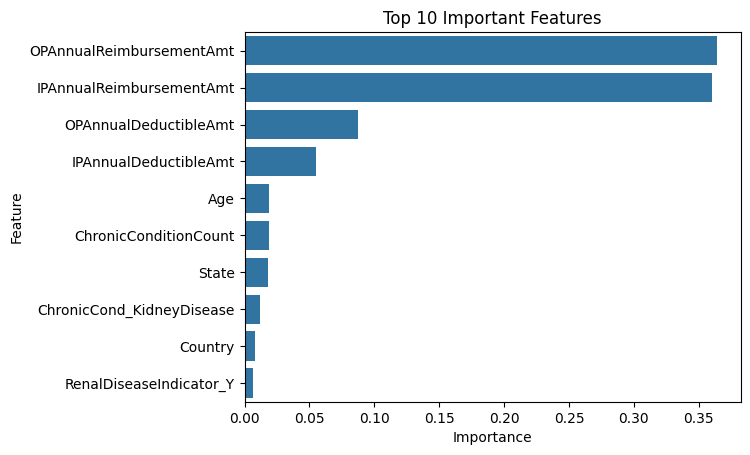

In [7]:
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [8]:
import pandas as pd
import numpy as np

# log_model, rf_model, gb_model are trained models
# X_test contains your test features
# y_test contains your actual labels

# Step 1: Assign Fraud Risk Scores
# Get the probability scores for each model
log_prob = log_model.predict_proba(X_test)[:, 1]
rf_prob = rf_model.predict_proba(X_test)[:, 1]
gb_prob = gb_model.predict_proba(X_test)[:, 1]

# Create a DataFrame to hold predictions and probabilities
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Logistic_Prob': log_prob,
    'RF_Prob': rf_prob,
    'GB_Prob': gb_prob
})

# Average the probabilities to get an overall fraud risk score
predictions_df['Fraud_Risk_Score'] = predictions_df[['Logistic_Prob', 'RF_Prob', 'GB_Prob']].mean(axis=1)

# Step 2: Profiling High-Risk Groups
# Define a threshold for high fraud risk (e.g., >0.5)
high_risk_threshold = 0.5
high_risk_group = predictions_df[predictions_df['Fraud_Risk_Score'] > high_risk_threshold]

# Add relevant beneficiary information from the original dataset
high_risk_group = high_risk_group.join(train_beneficiary.loc[X_test.index, ['BeneID', 'ChronicConditionCount', 'IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt']])

# Analyze common patterns in high-risk beneficiaries
common_patterns = high_risk_group.groupby('ChronicConditionCount').agg({
    'IPAnnualReimbursementAmt': ['mean', 'count'],
    'OPAnnualReimbursementAmt': ['mean', 'count'],
}).reset_index()

print("High-Risk Group Analysis:")
display(common_patterns)

# Step 3: Cost-Benefit Analysis
# Define the costs and potential savings
# Assuming you have a cost for each fraudulent claim caught
cost_per_fraudulent_claim = 10000  # Define your cost here
flagged_as_fraud = predictions_df[predictions_df['Fraud_Risk_Score'] > high_risk_threshold]

# Calculate total potential savings from flagged fraudulent claims
# Assuming that each fraudulent claim is flagged as such
total_fraudulent_claims_flagged = flagged_as_fraud['Actual'].sum()  # Count how many were actually fraudulent
potential_savings = total_fraudulent_claims_flagged * cost_per_fraudulent_claim

# Display results
print("\nCost-Benefit Analysis:")
display(f"Total Fraudulent Claims Flagged: {total_fraudulent_claims_flagged}")
display(f"Potential Savings from Flagged Claims: ${potential_savings:,.2f}")



High-Risk Group Analysis:


ChronicConditionCount IPAnnualReimbursementAmt        \
                                            mean count   
0                     1             14706.666667     6   
1                     2             10287.500000     4   
2                     3             20067.647059    17   
3                     4             12112.941176    17   
4                     5             12105.384615    13   
5                     6             21710.526316    19   
6                     7             18906.250000     8   
7                     8             31606.666667     9   
8                     9             14782.000000     5   
9                    10             53450.000000     4   

  OPAnnualReimbursementAmt        
                      mean count  
0              4278.333333     6  
1              3115.000000     4  
2              4492.352941    17  
3              4368.823529    17  
4              6802.307692    13  
5              4900.526316    19  
6              2676.250000     8  
7              2298.888889     9  
8              8868.000000     5  
9              3810.000000     4


Cost-Benefit Analysis:


'Total Fraudulent Claims Flagged: 102'

'Potential Savings from Flagged Claims: $1,020,000.00'

#Test beneficiary

In [10]:
# Load the final data
test_beneficiary= pd.read_excel('/content/drive/My Drive/FDS PROJECT/Final_data/test_bene_final_data.xlsx')

In [11]:
display(test_beneficiary.columns)

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'Country', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'ChronicConditionCount'],
      dtype='object')

In [12]:
# Define thresholds for fraud detection
threshold_ip = test_beneficiary['IPAnnualReimbursementAmt'].quantile(0.95)  # Top 5% for inpatient
threshold_op = test_beneficiary['OPAnnualReimbursementAmt'].quantile(0.95)  # Top 5% for outpatient

# Create the target variable 'fraud'
test_beneficiary['fraud'] = np.where(
    (test_beneficiary['IPAnnualReimbursementAmt'] > threshold_ip) |
    (test_beneficiary['OPAnnualReimbursementAmt'] > threshold_op),
    1,  # Fraudulent
    0   # Not fraudulent
)

# Define features (X) and target (y)
X = test_beneficiary.drop(columns=['fraud', 'DOB', 'DOD', 'BeneID'])  # Drop non-feature columns
y = test_beneficiary['fraud']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("AUC-ROC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("AUC-ROC:", roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       905
           1       0.79      0.80      0.80        87

    accuracy                           0.96       992
   macro avg       0.88      0.89      0.89       992
weighted avg       0.96      0.96      0.96       992

AUC-ROC: 0.9890899853940432
Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       905
           1       1.00      1.00      1.00        87

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992

AUC-ROC: 1.0
Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       905
           1       1.00      1.00      1.00        87

    accuracy                           1.00       992
   macro avg       1.00      1.0

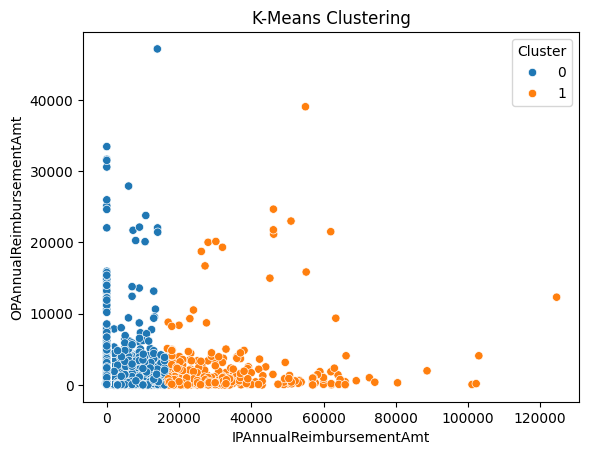

Detected Anomalies:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,Country,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,ChronicConditionCount,fraud,Cluster,Anomaly
13,BENE85389,1934-03-01,NaT,F,1,N,23,380,12,12,...,1,30600,4272,80,200,90,8,1,1,-1
14,BENE85403,1943-12-01,NaT,F,1,Y,52,60,12,12,...,1,0,0,15950,3360,80,8,1,0,-1
17,BENE85415,1941-01-01,NaT,M,2,Y,6,60,12,12,...,1,0,0,210,50,83,9,0,0,-1
21,BENE85463,1911-06-01,NaT,F,1,N,46,20,12,12,...,1,0,0,330,510,113,7,0,0,-1
24,BENE85482,1936-09-01,NaT,M,1,N,22,90,12,12,...,0,69060,2136,590,60,88,7,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,BENE158416,1924-05-01,NaT,F,1,Y,50,20,12,12,...,0,8060,2136,570,100,100,5,0,0,-1
4912,BENE158526,1939-06-01,NaT,M,3,N,5,90,12,12,...,0,18000,9068,4830,740,85,9,1,1,-1
4919,BENE158592,1951-12-01,NaT,F,1,N,46,20,12,12,...,0,13000,1068,9360,1020,72,7,1,0,-1
4929,BENE158745,1915-11-01,NaT,M,5,Y,3,20,12,12,...,1,7000,1068,12430,4150,109,7,1,0,-1


In [13]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

# K-Means Clustering
kmeans = KMeans(n_clusters=2)  # Adjust the number of clusters as needed
test_beneficiary['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
sns.scatterplot(data=test_beneficiary, x='IPAnnualReimbursementAmt', y='OPAnnualReimbursementAmt', hue='Cluster')
plt.title("K-Means Clustering")
plt.show()

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination as needed
test_beneficiary['Anomaly'] = iso_forest.fit_predict(X)
anomalies = test_beneficiary[test_beneficiary['Anomaly'] == -1]  # Outliers

# Print anomalies
print("Detected Anomalies:")
display(anomalies)


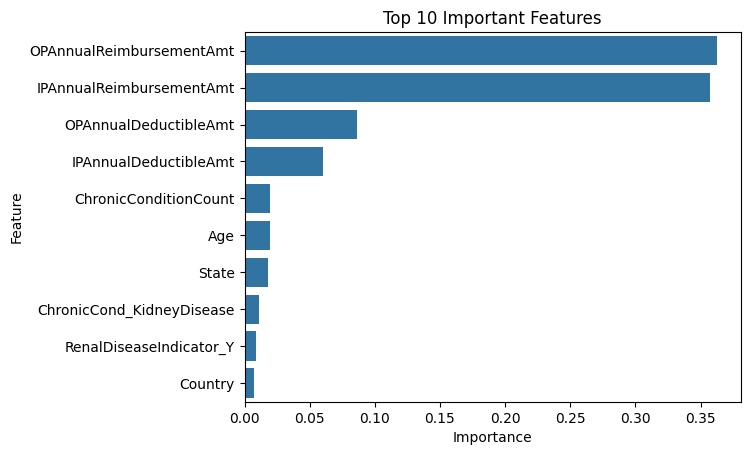

In [14]:
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [16]:
import pandas as pd
import numpy as np

# log_model, rf_model, gb_model are trained models
# X_test contains your test features
# y_test contains your actual labels

# Step 1: Assign Fraud Risk Scores
# Get the probability scores for each model
log_prob = log_model.predict_proba(X_test)[:, 1]
rf_prob = rf_model.predict_proba(X_test)[:, 1]
gb_prob = gb_model.predict_proba(X_test)[:, 1]

# Create a DataFrame to hold predictions and probabilities
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Logistic_Prob': log_prob,
    'RF_Prob': rf_prob,
    'GB_Prob': gb_prob
})

# Average the probabilities to get an overall fraud risk score
predictions_df['Fraud_Risk_Score'] = predictions_df[['Logistic_Prob', 'RF_Prob', 'GB_Prob']].mean(axis=1)

# Step 2: Profiling High-Risk Groups
# Define a threshold for high fraud risk (e.g., >0.5)
high_risk_threshold = 0.5
high_risk_group = predictions_df[predictions_df['Fraud_Risk_Score'] > high_risk_threshold]

# Add relevant beneficiary information from the original dataset
high_risk_group = high_risk_group.join(test_beneficiary.loc[X_test.index, ['BeneID', 'ChronicConditionCount', 'IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt']])

# Analyze common patterns in high-risk beneficiaries
common_patterns = high_risk_group.groupby('ChronicConditionCount').agg({
    'IPAnnualReimbursementAmt': ['mean', 'count'],
    'OPAnnualReimbursementAmt': ['mean', 'count'],
}).reset_index()

print("High-Risk Group Analysis:")
display(common_patterns)

# Step 3: Cost-Benefit Analysis
# Define the costs and potential savings
# Assuming you have a cost for each fraudulent claim caught
cost_per_fraudulent_claim = 10000  # Define your cost here
flagged_as_fraud = predictions_df[predictions_df['Fraud_Risk_Score'] > high_risk_threshold]

# Calculate total potential savings from flagged fraudulent claims
# Assuming that each fraudulent claim is flagged as such
total_fraudulent_claims_flagged = flagged_as_fraud['Actual'].sum()  # Count how many were actually fraudulent
potential_savings = total_fraudulent_claims_flagged * cost_per_fraudulent_claim

# Display results
print("\nCost-Benefit Analysis:")
display(f"Total Fraudulent Claims Flagged: {total_fraudulent_claims_flagged}")
display(f"Potential Savings from Flagged Claims: ${potential_savings:,.2f}")



High-Risk Group Analysis:


ChronicConditionCount IPAnnualReimbursementAmt        \
                                            mean count   
0                     0                 0.000000     2   
1                     1             28500.000000     2   
2                     2             18025.000000     4   
3                     3             35715.000000     8   
4                     4             13196.000000    15   
5                     5              9812.857143    14   
6                     6             20040.625000    16   
7                     7             21521.428571    14   
8                     8             39002.500000     8   
9                     9             13000.000000     4   

  OPAnnualReimbursementAmt        
                      mean count  
0              5500.000000     2  
1              3000.000000     2  
2              3227.500000     4  
3              3165.000000     8  
4              4652.000000    15  
5              4791.428571    14  
6              8045.000000    16  
7              5387.857143    14  
8               997.500000     8  
9              7302.500000     4


Cost-Benefit Analysis:


'Total Fraudulent Claims Flagged: 87'

'Potential Savings from Flagged Claims: $870,000.00'